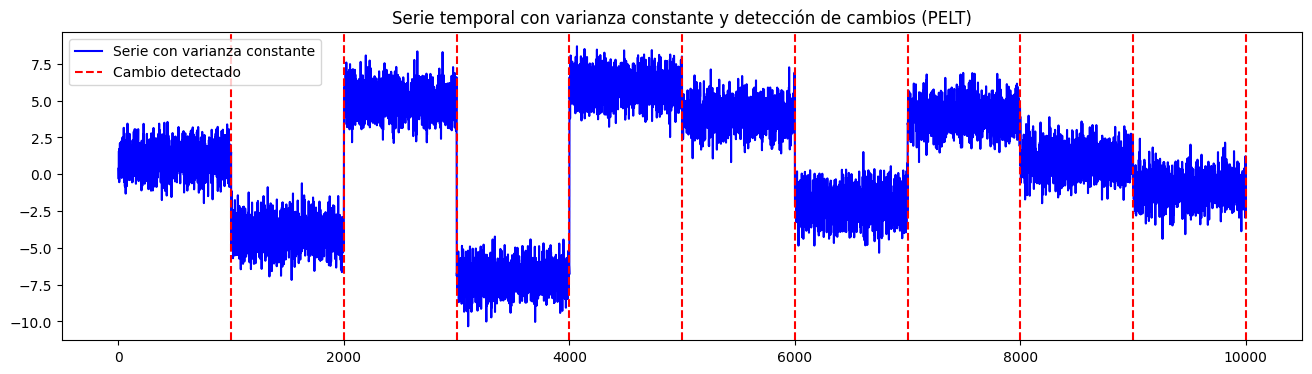

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt


# Función para generar una serie con VARIANZA CONSTANTE
def serieVarianzaConstante(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(np.random.randint(-10, 10), 1, tamano_segmento)  
        for _ in range(num_segmentos) 
    ])
    return pd.Series(serie)  

# Generar las dos series usando las funciones
serie1 = serieVarianzaConstante(10, 1000)    

# Convertir la serie en un array numpy
serie1_np = serie1.values.reshape(-1, 1)

# Aplicar PELT con el modelo "rbf" 
algo = rpt.Pelt(model="rbf").fit(serie1_np)

# Obtener los cambios con una penalización específica (ajustable)
cambios_varianza = algo.predict(pen=5)

# Graficar la serie y los cambios en un solo gráfico
plt.figure(figsize=(16, 4))
plt.plot(serie1, label="Serie con varianza constante", color='blue')

# Dibujar líneas verticales en los puntos de cambio detectados
for cambio in cambios_varianza:
    plt.axvline(x=cambio, color='red', linestyle='--', label="Cambio detectado" if cambio == cambios_varianza[0] else None)

plt.title("Serie temporal con varianza constante y detección de cambios (PELT)")
plt.legend()
plt.show()